タイトル：　はじめてのデータ分析　データ前処理から回帰直線


この記事はNTTテクノクロス Advent Calendar 2023　シリーズ1の19日目です。

NTTテクノクロスの大澤と申します。
普段はPythonを用いてデータ分析業務を担当しており、今回はデータ分析初学者向けに、Pythonを使ってデータ前処理から回帰直線で数値を予測するところまでを記事にしました。

## はじめに
データ分析でよく使われるファイル形式としてノートブック形式というファイル形式があります。
普段開発をされている方で、特にVSCodeを使用されている方は下記を参考にjupyter notebookの環境を構築してください。

[VSCodeでJupyter Notebookを使ってみた【ゼロからPython勉強してみる】
](https://qiita.com/starfieldKt/items/ed7dee5142d9d5c177fd)

特に使用しているエディタもなく、コーディング経験があまりない方についてはGoggleが提供している「Colaboratory」というサービスがあります。
Googleのアカウントさえあれば、環境構築は不要ですぐ使用できるのでこちらをお試しください。

下記TOPページへアクセス＞「ノートブックを新規作成」
[Google Colaboratory](https://colab.research.google.com/?hl=ja)

## 今回のゴール
テストデータとして、身長、体重のデータを作成しました。
このテストデータを用いてデータの前処理、統計量の確認、データの可視化から、身長と体重に何かしらの関係があると推測のもと、回帰直線を図示します。

（なんか絵を描く？？）

（Tex？？）
体重 = a * 身長 + b

## 準備

今回の分析で必要なライブラリをインポートします。
それぞれのライブラリの用途を大まかに記載します。
詳細は公式HPをご覧ください。

* pandas:分析、加工をしやすいように表形式（データフレーム）に変換可能。
* numpy:行列計算や乱数生成などを担当。
* matplotlib:グラフの描画に使用。
* sklearn:クラスタリングや回帰分析など、分析をする際に使用。

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

今回使用するPython、ライブラリのバージョンは以下です。
最新のバージョンで動かない場合はバージョンをそろえてみてください。

今回は身長と体重のテストデータを作成しました。
まずはcsv形式のファイルをインポートし、分析や加工がしやすいようにデータフレーム形式に変換します。
（gitに指定。）

In [ ]:
#csvをインポートし、データフレームに格納
df = pd.read_csv('sample_data/sample.csv')
df

,height,weight
0,144.0,48.0
1,170.0,67.0
2,163.0,70.0
3,181.0,68.0
4,169.0,63.0
5,167.0,61.0
6,157.0,64.0
7,190.0,NaN
8,166.0,78.0
9,144.0,50.0


## データ前処理

実際に分析を始める前に必要な作業として、データに問題がないかチェックをする必要があります。
様々な手法がありますが、今回は2種類の前処理を行っていきます。

* 欠損値（NULL）除去
* 外れ値除去

### 欠損値（NULL）チェック

データの中にNULLがある場合、分析の妨げになることが多いため取り除く必要があります。
今回はテストデータのためあえてNULLを入れていますが、購買データ、センサーデータなど、何かしらの理由でデータがうまく取れない場合も多く想定されるので確認が重要です。
NULLの個数を算出した結果、今回はheight,weightそれぞれ1個ずつNULLのデータがあることがわかりました。

In [ ]:
#データフレームに含まれるNULLの個数を算出
df.isnull().sum()

height    1
weight    1
dtype: int64

NULL値は除去した結果、実際にデータフレームから削除されたのがわかるかと思います。

In [ ]:
#データフレームに含まれるNULLを除去
df_drop = df.dropna()
df_drop

,height,weight
0,144.0,48.0
1,170.0,67.0
2,163.0,70.0
3,181.0,68.0
4,169.0,63.0
5,167.0,61.0
6,157.0,64.0
8,166.0,78.0
9,144.0,50.0
10,179.0,72.0


任意ですが、インデックスを修正する場合は以下を実行してください。
今回のように欠損値除去など、データフレームのレコードを削除を行うとインデックスがずれる場合があります。
データの特性、分析する目的に応じて実行してください。

In [ ]:
#インデックスの振りなおし
df_drop = df_drop.reset_index(drop=True)
df_drop

,height,weight
0,144.0,48.0
1,170.0,67.0
2,163.0,70.0
3,181.0,68.0
4,169.0,63.0
5,167.0,61.0
6,157.0,64.0
7,166.0,78.0
8,144.0,50.0
9,179.0,72.0


### 外れ値除去

データによっては、明らかに分布からはみ出ている特異なデータが存在することがあります。
今回はインデックス20番「height:220	weight:150」のデータを指します。
このデータを残しておくか、除去するかはデータの特性、分析する目的に応じて検討する必要があります。
今回の分析としては「身長が200cm以下の身長、体重の回帰直線を作成」と仮定し、除去します。
除去する方法は複数あり、データの中で上位〇%、下位〇%を削除という方法も可能ですが、今回は閾値を設定してそれ以上のデータは除去、という形をとりたいと思います。

In [ ]:
#身長が200以下を選択（200より大きい行を削除）
df_drop = df_drop.query('height <= 200')
df_drop

,height,weight
0,144.0,48.0
1,170.0,67.0
2,163.0,70.0
3,181.0,68.0
4,169.0,63.0
5,167.0,61.0
6,157.0,64.0
7,166.0,78.0
8,144.0,50.0
9,179.0,72.0


データ数が多く、閾値を分布によって決定したい場合パーセンタイルで閾値を設定してください。
以下は上位5%を除去したい場合のコードです。

In [ ]:
#上位5%（95%）以下のデータを残す

# percentile = df_drop.height.quantile(0.95)
# df_drop = df_drop.query('height < @percentile')
# df_drop

,height,weight
0,144.0,48.0
1,170.0,67.0
2,163.0,70.0
3,181.0,68.0
4,169.0,63.0
5,167.0,61.0
6,157.0,64.0
7,166.0,78.0
8,144.0,50.0
9,179.0,72.0


### オプション:正規化

In [ ]:
#書こうか迷っている。

データの前処理にはこれ以外にも、データの値が極端に大きい場合は正規化、カテゴリなどの文字で書かれているデータを数字として扱うダミー変数など様々です。
データの特性に応じて適切な前処理を行ってください。

* 正規化
  * [scipyを用いた正規化](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html)

* ダミー変数
  * [pandasを用いたダミー変数への変換](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

## データ可視化

データの前処理を行ったことにより、より分析をしやすい形に変換することができました。
これから実際に回帰直線を書いていきますが、準備としてデータの特徴を確認する必要があります。

まずは身長、体重それぞれの統計量を算出します。

* count:データの個数
* mean:平均
* std:標準偏差
* min:最小値
* 25%:第一四分位数
* 50%:中央値
* 75%:第三四分位数
* max:最大値


In [ ]:
#データフレームに含まれるカラムの統計量を算出
df_drop.describe()

,height,weight
count,20.000000,20.000000
mean,162.800000,63.350000
std,12.951732,7.520323
min,144.000000,48.000000
25%,150.750000,60.000000
50%,164.000000,63.500000
75%,169.250000,68.250000
max,186.000000,78.000000


身長、体重の分布を確認するため、それぞれヒストグラムを図示します。

array([[<Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'weight'}>]], dtype=object)

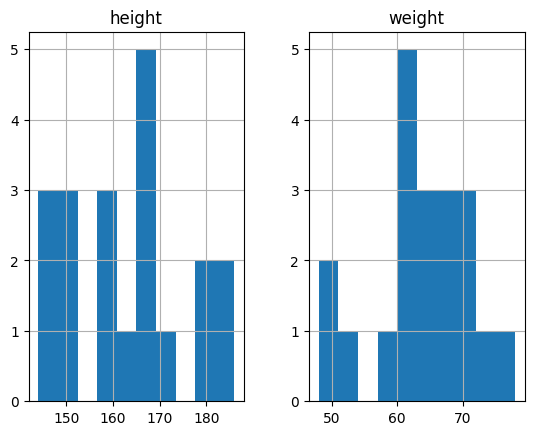

In [ ]:
#データフレームに含まれるカラムのヒストグラムを図示
df_drop.hist()

回帰直線を記載する前に、散布図を作成し相関があるか確認します。

<Axes: xlabel='height', ylabel='weight'>

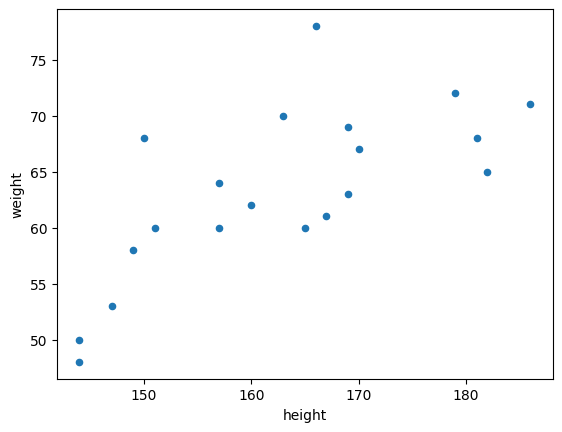

In [ ]:
#x軸、y軸を指定し散布図を作成
df_drop.plot(x='height', y='weight', kind='scatter')

## 回帰直線

散布図を確認すると、もちろん誤差はありますが正の相関をしており、右肩上がりの直線として「体重 = a * 身長 + b」という直線の近似式は書けそうな分布をしています。

こちらの予測のもと、回帰直線を作成していきます。
データ分析においてよく使われる単語として、目的変数、説明変数というものがあります。
今回のケースでは身長から体重を予測したいため、それぞれ以下のように分けられます。

* 目的変数（予測したい数値）：体重
* 説明変数（目的変数と因果関係に**ありそうな**数値）：身長

早速「scikit-learn」というライブラリを用いて回帰直線を作成していきます。

データさえ用意すればあとは簡単で、すでにモデルが用意されているのでデータを読み込ませていきます。
より詳細にパラメータを設定したい場合は公式HPなどを参考に設定してみてください。

* [scikit-learn LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
#説明変数、目的変数それぞれNumpy配列に格納
X = df_drop[['height']].values
Y = df_drop[['weight']].values

#回帰直線を作成するモデルにデータを読み込む
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

処理が終わるとモデルが算出した直線の傾き、切片がわかります。

In [ ]:
print('傾き:', model.coef_)

print('切片:', model.intercept_)

傾き: [[0.40800703]]
切片: [-3.07354418]


これにより、おおまかに「体重=0.4 * 身長 - 3.0」という直線が算出されました。
算出された回帰直線が問題なく予測できているか、先ほどの散布図に直線を図示してみます。

In [ ]:
#a = model.coef_[0,0]
#b = model.intercept_[0]

#print(a)
#print(b)

NameError: ignored

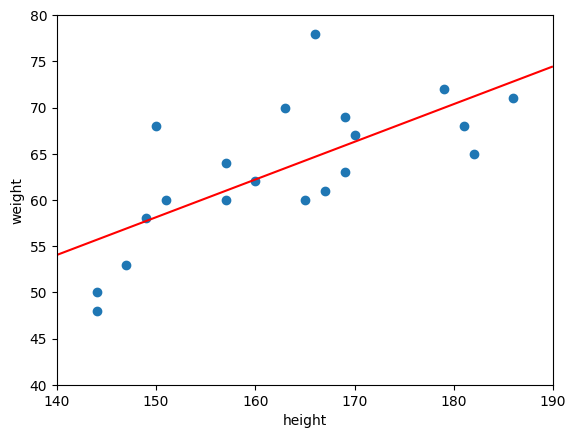

In [ ]:
#傾き、切片を定数に変換
a = model.coef_[0,0]
b = model.intercept_[0]

#x軸の定義域を指定
x = np.arange(140,190,0.1)
#傾き、切片を代入
y = a * x + b

#グラフの設定
plt.xlim([140,190])
plt.xlabel("height")
plt.ylim([40,80])
plt.ylabel("weight")
plt.scatter(X,Y)
plt.plot(x,y,color="red")

実際に散布図と合わせて図示してみたところ、確かにプロットした点に乗っている回帰直線が作成できましたが、もっと正確な回帰直線を作成する余地はありそうです。
より精度をあげるためにはデータ数を多くする、身長以外にも年齢など体重の要因となり得るデータを説明変数に加える、作成した回帰直線がどれだけ信頼できるかテストデータの用意をしたり決定係数を算出するなど、様々な手法が挙げられます。

まずはデータ分析初学者のために、データ前処理から回帰直線を作成するところまでやってみました。
次回は、データ数を増やし、説明変数を複数用意した重回帰分析をやっていきます。